# Funciones de distribucion de probabilidad

### Distribucion uniforme

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
a=1
b=10
n=100000
data=np.random.uniform(a,b,n)

(array([ 9930.,  9840.,  9968.,  9979., 10162.,  9907., 10186.,  9898.,
        10187.,  9943.]),
 array([1.00009129, 1.90007143, 2.80005158, 3.70003173, 4.60001188,
        5.49999202, 6.39997217, 7.29995232, 8.19993247, 9.09991261,
        9.99989276]),
 <a list of 10 Patch objects>)

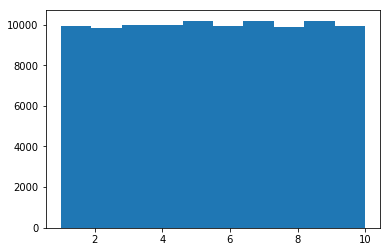

In [17]:
%matplotlib inline 
plt.hist(data)

### Distribucion normal

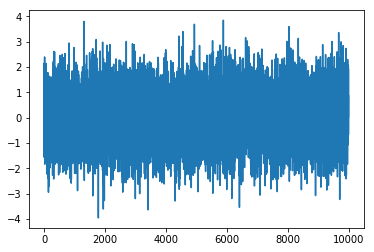

In [24]:
data=np.random.randn(10000)
x=range(1,10001)
plt.plot(x,data)

(array([   9.,   67.,  438., 1471., 2819., 2917., 1603.,  555.,  111.,
          10.]),
 array([-3.96117183, -3.18046056, -2.39974929, -1.61903802, -0.83832676,
        -0.05761549,  0.72309578,  1.50380704,  2.28451831,  3.06522958,
         3.84594085]),
 <a list of 10 Patch objects>)

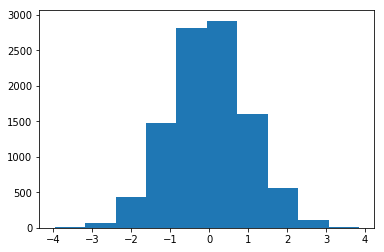

In [25]:
plt.hist(data)

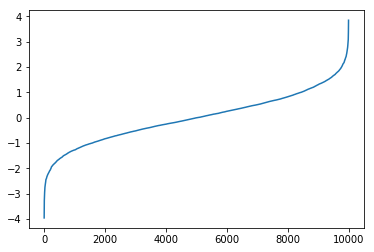

In [26]:
plt.plot(x,sorted(data))

(array([  15.,  163.,  756., 2016., 3048., 2554., 1111.,  294.,   39.,
           4.]),
 array([-3.80888926, -1.82179736,  0.16529454,  2.15238644,  4.13947835,
         6.12657025,  8.11366215, 10.10075405, 12.08784596, 14.07493786,
        16.06202976]),
 <a list of 10 Patch objects>)

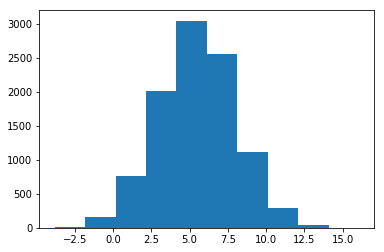

In [27]:
mu=5.5
sd=2.5
data=5.5+2.5*np.random.randn(10000) #z=(x-mu)/sd da
plt.hist(data)

In [28]:
data=np.random.randn(2,4)

In [29]:
data

array([[-0.61376475, -0.24561692,  0.78811104, -0.15991008],
       [-0.70160041,  1.18832226, -1.86606946, -0.58377409]])

## La simulacion de montecarlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$:
    * Si $z < 1 \rightarrow$ estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π. 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.
    

In [30]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

In [ ]:
pi_montecarlo(10000, 200)